### 数据集

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [73]:
from sklearn.datasets import make_blobs
# make_blobs:用于生成具有聚类结构的模拟数据
x,y = make_blobs(
    n_samples = 40,
    # 指定生成的样本数量
    centers = 2,
    # 指定数据中的聚类中心数量
    random_state = 0
)# 将返回的特征数据和标签数据分别赋值给 x 和 y
# n_features：指定样本的特征维度，默认是2位特征数据

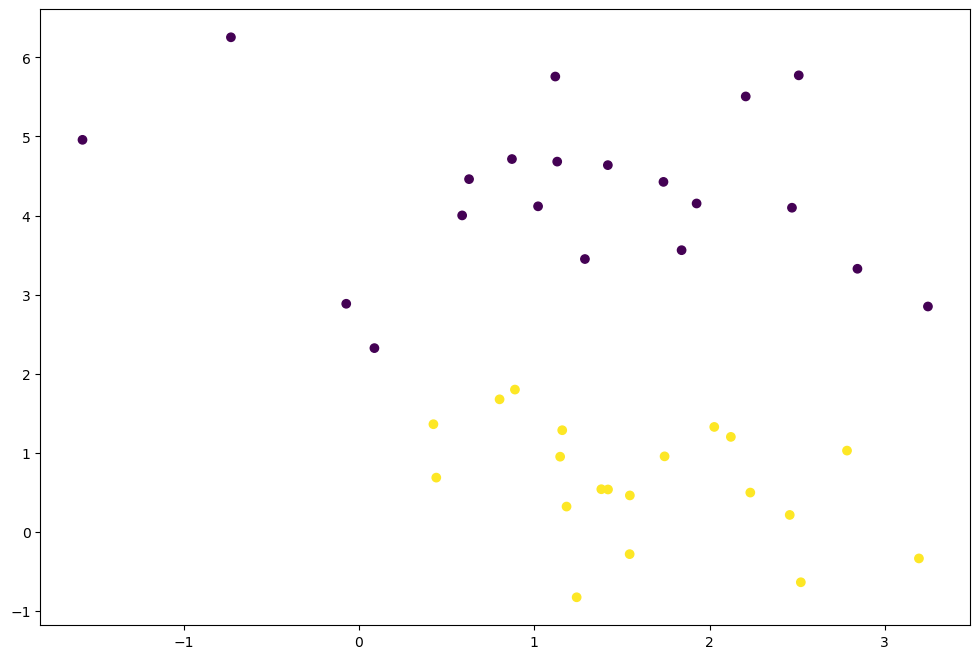

In [75]:
plt.scatter(x[:,0],x[:,1],c = y)
plt.show()

### sklearn中的线性SVM

In [78]:
from sklearn.svm import LinearSVC
# LinearSVC：线性支持特征向量分类器

In [80]:
clf = LinearSVC(C = 1)
# C:正则化参数，软分隔中的超参数

In [82]:
clf.fit(x,y)

LinearSVC(C=1)

In [84]:
clf.score(x,y)

1.0

In [86]:
def decision_boundary_plot(X,y,clf):
    axis_x1_min,axis_x1_max = X[:,0].min()-1,X[:,0].max()+1
    # 计算特征X第一列的最小值和最大值，分别减1和加1，确定绘图时x轴(第一特征)的范围
    axis_x2_min,axis_x2_max = X[:,1].min()-1,X[:,1].max()+1

    x1,x2 = np.meshgrid(np.arange(axis_x1_min,axis_x1_max,0.01),np.arange(axis_x2_min,axis_x2_max,0.01))
    # 使用meshgrid生成网络点，x1和x2是二维数组，形成密集的网络，步长为0.01，用于覆盖整个特征空间
    z = clf.predict(np.c_[x1.ravel(),x2.ravel()])
    # np.ravel():将多维数组展平成一维数组
    # 将x1和x2展平后按列拼接成特征矩阵使用模型clf预测这些网格点的类别，结果存储在z中
    z = z.reshape(x1.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(["#F5B9EF","#BBFFBB","#F9F9CB"])

    plt.contourf(x1,x2,z,cmap=custom_cmap)
    plt.scatter(X[:,0],X[:,1],c = y)
    plt.show()

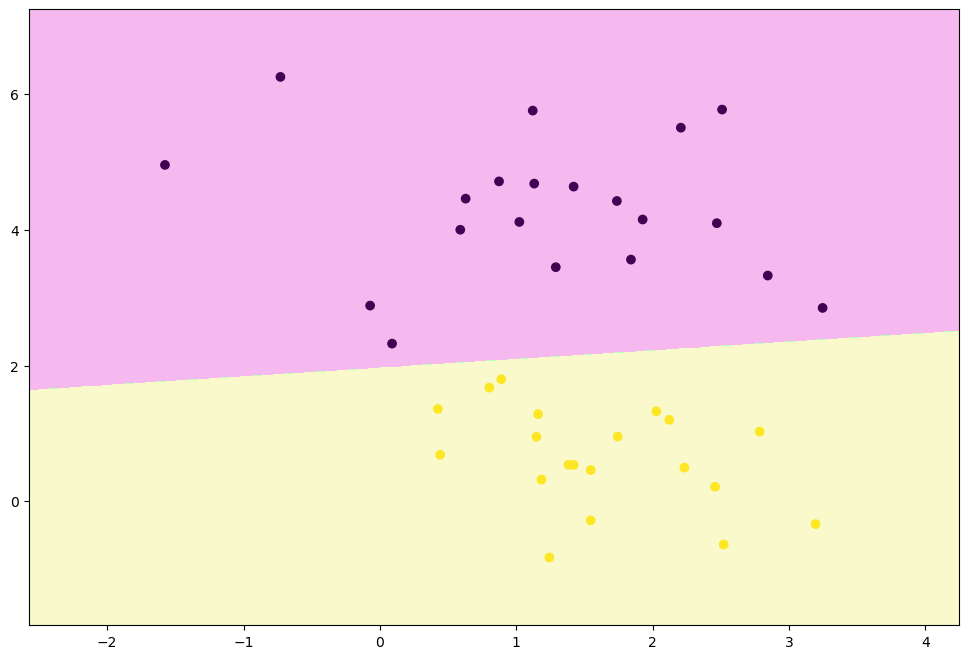

In [88]:
decision_boundary_plot(x,y,clf)

In [90]:
# 定义函数plot_svm_margin，用于绘制SVM的决策边界和间隔
def plot_svm_margin(x,y,clf,ax = None):
    # x:特征数据
    # y:标签
    # clf:训练好的SVM模型
    # ax:可选的绘画轴（默认位None）
    from sklearn.inspection import DecisionBoundaryDisplay
    # DecisionBoundaryDisplay:用于可视化模型的决策边界
    DecisionBoundaryDisplay.from_estimator(
        clf,
        x,
        ax = ax,
        grid_resolution = 50,
        # 设置网格分辨率为50，控制可视化的精细程度
        plot_method = "contour",
        # 使用等高线绘制决策边缘
        colors = "k",
        # 设置颜色为黑色
        levels = [-1,0,1],
        # 定义等高线的级别，对应SVM决策函数的不同取值（-1 和 1表示间隔边界，0表示决策边界）
        alpha = 0.5,
        # 设置透明度为0.5
        linestyles = ["--","-","--"],
        # 设置线条样式，分别对应分隔边界（虚线）和决策边界（实线）
    )
    plt.scatter(x[:,0],x[:,1],c = y)
    

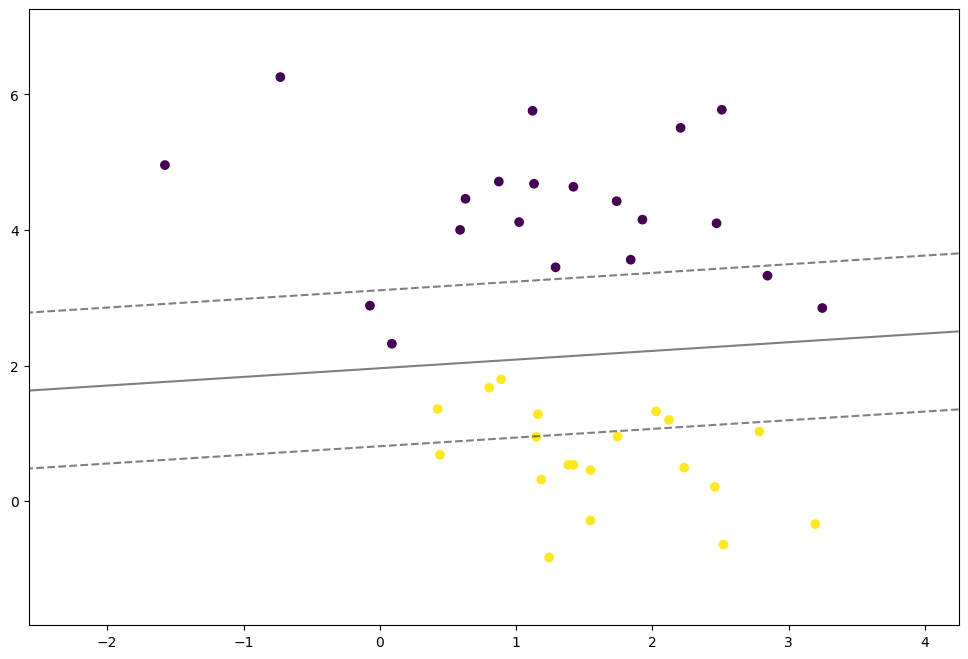

In [92]:
plot_svm_margin(x,y,clf)
plt.show()

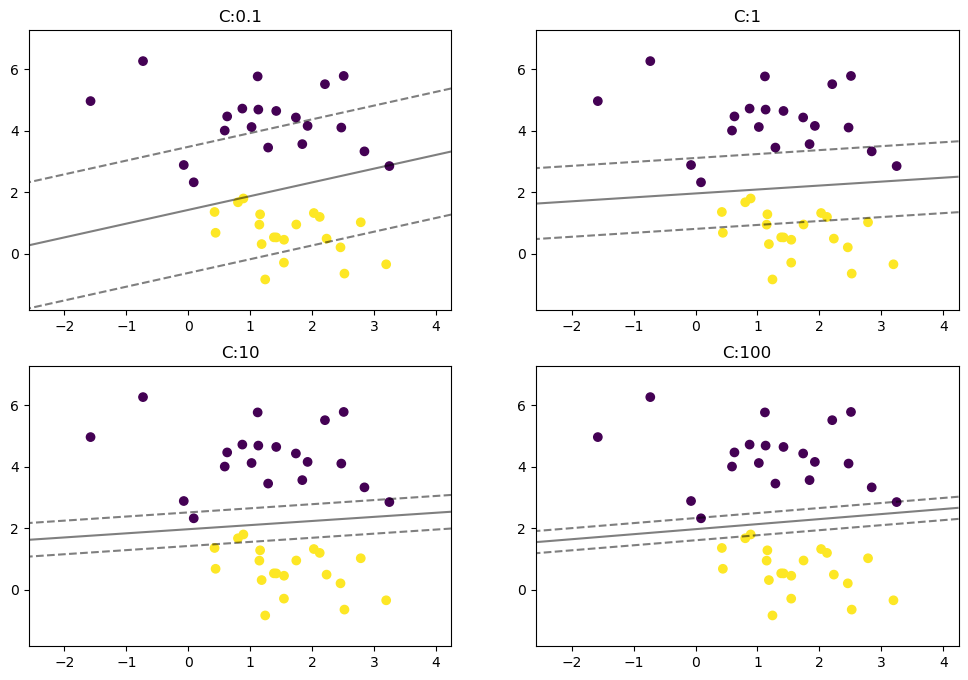

In [94]:
plt.rcParams["figure.figsize"] = (12,8)
# 设定整个图像的宽度为12，高度为8
params = [0.1,1,10,100]
for i ,c in enumerate(params):
    # enumerate(params):对params列表进行列举，为每个元素生成一个包含索引和元素值的元组
    clf = LinearSVC(C = c,random_state = 86)
    clf.fit(x,y)

    ax = plt.subplot(2,2,i+1)
    # 创建2 x 2的子图布局，当前为第i+1个子图并设置标题显示当前C值
    plt.title("C:{0}".format(c))
    plot_svm_margin(x,y,clf,ax)

### 多分类

In [97]:
from sklearn import datasets

iris = datasets.load_iris()
x = iris.data
y = iris.target

In [103]:
clf = LinearSVC(C = 0.1,multi_class = 'ovr',random_state = 86)
# 不支持'ovo'，只支持'ovr'
clf.fit(x,y)

LinearSVC(C=0.1, random_state=86)

In [105]:
clf.predict(x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [113]:
clf.score(x,y)

0.96

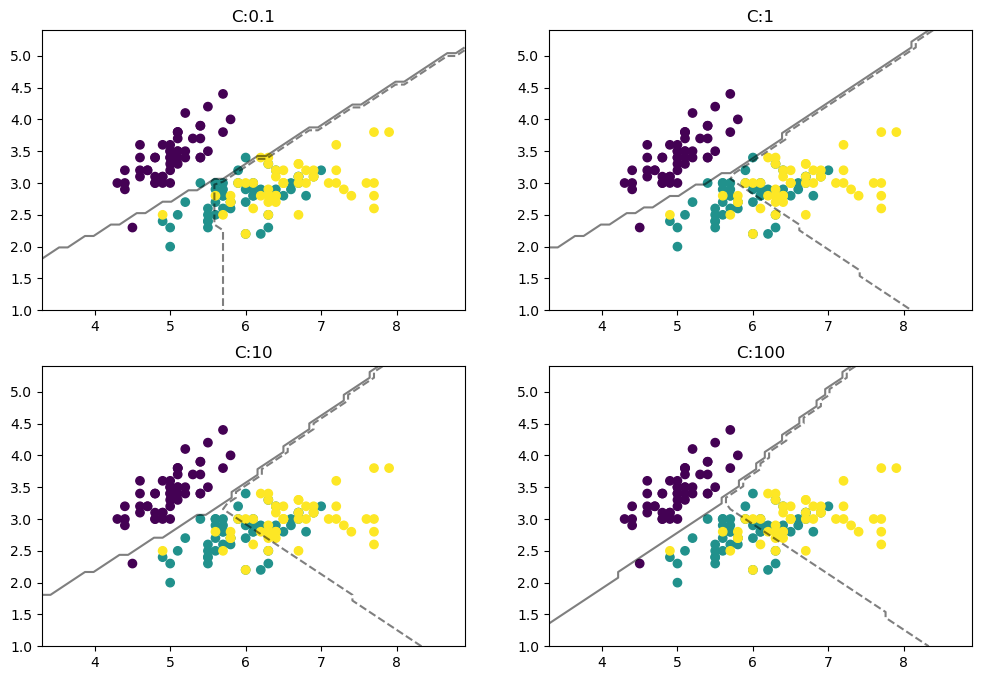

In [119]:
plt.rcParams["figure.figsize"] = (12,8)
# 设定整个图像的宽度为12，高度为8
params = [0.1,1,10,100]
for i ,c in enumerate(params):
    # enumerate(params):对params列表进行列举，为每个元素生成一个包含索引和元素值的元组
    clf = LinearSVC(C = c,random_state = 86)
    clf.fit(x[:,:2],y)

    ax = plt.subplot(2,2,i+1)
    # 创建2 x 2的子图布局，当前为第i+1个子图并设置标题显示当前C值
    plt.title("C:{0}".format(c))
    plot_svm_margin(x[:,:2],y,clf,ax)